In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [76]:
feature_names = [
    'Powierzchnia',                                        # 1
    'Wynagrodzenie_ogolem',                                # 2
    'Wynagrodzenie_w_relacji_do_sredniej',                 # 3
    'Dochody_podatek_lesny',                               # 4
    'Dochody_podatek_PCC',                                 # 5
    'Dochody_podatek_od_dzialalnosci_gospodarczej',        # 6
    'Dochody_podatek_od_nieruchomosci',                    # 7
    'Dochody_podatek_od_spadkow',                          # 8
    'Dochody_podatek_od_srodkow_transportowych',           # 9
    'Dochody_podatek_rolny',                               # 10
    'Dochody_podatek_odrebne_ustawy',                      # 11
    'Dochody_razem',                                       # 12
    'Dochody_z_majatku',                                   # 13
    'Dochody_z_najmu_i_dzierzawy',                         # 14
    'Dochody_z_uslug',                                     # 15
    'Dochody_dofinansowanie_inwestycyjne',                 # 16
    'Dochody_dofinansowanie_razem',                        # 17
    'Udzialy_w_podatkach_dochodowych_od_osob_fizycznych',  # 18
    'Udzialy_w_podatkach_dochodowych_od_osob_prywatnych',  # 19
    'Udzialy_w_podatkach_dochodowych_razem',               # 20
    'Wplywy_z_innych_lokalnych_oplat',                     # 21
    'Wplywy_z_oplaty_eksploatacyjnej',                     # 22
    'Wplywy_z_oplaty_skarbowej',                           # 23
    'Wplywy_z_oplaty_targowej',                            # 24
    'Ludnosc_ogolem',                                      # 25
    'Ludnosc_w_wieku_poprodukcyjnym',                      # 26
    'Ludnosc_w_wieku_produkcyjnym',                        # 27
    'Ludnosc_w_wieku_produkcyjnym_mobilnym',               # 28
    'Ludnosc_w_wieku_produkcyjnym_niemobilnym',            # 29
    'Ludnosc_w_wieku_przedprodukcyjnym',                   # 30
    'Ludnosc_mezczyzni',                                   # 31
    'Ludnosc_mezczyzni_w_wieku_poprodukcyjnym',            # 32
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym',              # 33
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym_mobilnym',     # 34
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym_niemobilnym',  # 35
    'Ludnosc_mezczyzni_w_wieku_przedprodukcyjnym',         # 36
    'Ludnosc_kobiety',                                     # 37
    'Ludnosc_kobiety_w_wieku_poprodukcyjnym',              # 38
    'Ludnosc_kobiety_w_wieku_produkcyjnym',                # 39
    'Ludnosc_kobiety_w_wieku_produkcyjnym_mobilnym',       # 40
    'Ludnosc_kobiety_w_wieku_produkcyjnym_niemobilnym',    # 41
    'Ludnosc_kobiety_w_wieku_przedprodukcyjnym',           # 42
    'Wojewodztwo_Dolnoslaskie',                            # 43
    'Wojewodztwo_Kujawsko_Pomorskie',                      # 44
    'Wojewodztwo_Lubelskie',                               # 45
    'Wojewodztwo_Lubuskie',                                # 46
    'Wojewodztwo_Lodzkie',                                 # 47
    'Wojewodztwo_Malopolskie',                             # 48
    'Wojewodztwo_Mazowieckie',                             # 49
    'Wojewodztwo_Opolskie',                                # 50
    'Wojewodztwo_Podkarpackie',                            # 51
    'Wojewodztwo_Podlaskie',                               # 52
    'Wojewodztwo_Pomorskie',                               # 53
    'Wojewodztwo_Slaskie',                                 # 54
    'Wojewodztwo_Swietokrzyskie',                          # 55
    'Wojewodztwo_Warminsko_Mazurskie',                     # 56
    'Wojewodztwo_Wielkopolskie',                           # 57
    'Wojewodztwo_Zachodniopomorskie',                      # 58
    'Gestosc_zaludnienia',                                 # 59
    'Ludnosc_na_1_km2',                                    # 60
    'Ludnosc',                                             # 61
    'Wskaznik_urbanizacji',                                # 62
    'Zmiana_liczby_ludnosci',                              # 63
    'Saldo_migracji_na_1000_ludnosci',                     # 64
    'Saldo_migracji',                                      # 65
    'Wymeldowania_do_miast_kobiety',                       # 66
    'Wymeldowania_do_miast_mezczyzni',                     # 67
    'Wymeldowania_do_miast_ogolem',                        # 68
    'Wymeldowania_na_wies_kobiety',                        # 69
    'Wymeldowania_na_wies_mezczyzni',                      # 70
    'Wymeldowania_na_wies_ogolem',                         # 71
    'Wymeldowania_kobiety',                                # 72
    'Wymeldowania_mezczyzni',                              # 73
    'Wymeldowania_ogolem',                                 # 74
    'Zameldowania_kobiety',                                # 75
    'Zameldowania_mezczyzni',                              # 76
    'Zameldowania_ogolem',                                 # 77
    'Zameldowania_z_miast_kobiety',                        # 78
    'Zameldowania_z_miast_mezczyzni',                      # 79
    'Zameldowania_z_miast_ogolem',                         # 80
    'Zameldowania_ze_wsi_kobiety',                         # 81
    'Zameldowania_ze_wsi_mezczyzni',                       # 82
    'Zameldowania_ze_wsi_ogolem',                          # 83
    'Miejsca_noclegowe_caloroczne',                        # 84
    'Miejsca_noclegowe_ogolem',                            # 85
    'Obiekty_caloroczne',                                  # 86
    'Obiekty_ogolem',                                      # 87
    'Turysci_ogolem',                                      # 88
    'Turysci_zagraniczni',                                 # 89
    'Bezrobotni_do_25_roku_zycia',                         # 90
    'Dlugotrwale_bezrobotni',                              # 91
    'Bezrobotne_kobiety',                                  # 92
    'Bezrobotni_mezczyzni',                                # 93
    'Bezrobotni_ogolem',                                   # 94
    'Bezrobotni_powyzej_50_roku_zycia',                    # 95
    'Gmina_miejska',                                       # 96
    'Gmina_miejsko_wiejska',                               # 97
    'Gmina_wiejska',                                       # 98
    'Odleglosc_Warszawa',                                  # 99
    'Odleglosc_od_centrum_decyzyjnego']                    # 100

all_columns = ['Kod', 'Rok'] + feature_names

In [77]:
df_data = pd.read_csv(
    'dane1.csv',
    encoding='ISO-8859-2',
    converters={'Kod': str})

In [78]:
df_odl = pd.read_csv(
    'gminy_centroid.csv',
    encoding='ISO-8859-2',
    converters={'TERYT': str})
df_odl['TERYT'] = df_odl['TERYT'].astype('str')
df_odl = df_odl[['TERYT', 'odl_Wawa', 'odl_woj']]
df_odl = df_odl.rename(columns={
    'TERYT': 'Kod',
    'odl_Wawa': 'Odleglosc_Warszawa',
    'odl_woj': 'Odleglosc_od_centrum_decyzyjnego'})

In [79]:
df_data = df_data.merge(df_odl, on=['Kod'], how='left')

In [80]:
print(df_data['Program_operacyjny'].drop_duplicates().values)

['Program Operacyjny Infrastruktura i ?rodowisko 2014-2020'
 'Program Operacyjny Inteligentny RozwĂłj'
 'Program Operacyjny Polska Cyfrowa'
 'Program Operacyjny Wiedza Edukacja RozwĂłj'
 'Program Operacyjny Polska Wschodnia']


In [81]:
# Wybór programu operacyjnego...
df_data = df_data.loc[df_data['Program_operacyjny'] == 'Program Operacyjny Infrastruktura i ?rodowisko 2014-2020'].reset_index(drop=True)
# df_data = df_data.loc[df_data['Program_operacyjny'] == 'Program Operacyjny Inteligentny RozwĂłj'].reset_index(drop=True)
# df_data = df_data.loc[df_data['Program_operacyjny'] == 'Program Operacyjny Polska Cyfrowa'].reset_index(drop=True)
# df_data = df_data.loc[df_data['Program_operacyjny'] == 'Program Operacyjny Wiedza Edukacja RozwĂłj'].reset_index(drop=True)
# df_data = df_data.loc[df_data['Program_operacyjny'] == 'Program Operacyjny Polska Wschodnia'].reset_index(drop=True)

# Uzupełnienie brakujących danych...
df_data[[
    'Miejsca_noclegowe_caloroczne',
    'Miejsca_noclegowe_ogolem',
    'Obiekty_caloroczne',
    'Obiekty_ogolem',
    'Turysci_ogolem',
    'Turysci_zagraniczni']] = df_data[[
        'Miejsca_noclegowe_caloroczne',
        'Miejsca_noclegowe_ogolem',
        'Obiekty_caloroczne',
        'Obiekty_ogolem',
        'Turysci_ogolem',
        'Turysci_zagraniczni']].fillna(0)

# Usunięcie niepotrzebnych rzędów...
df_data.dropna(inplace=True)
df_data = df_data[df_data['Suma'] > 0]

df_data = df_data.groupby(all_columns)['Suma'].sum().reset_index()

# ...
df_data['Suma'] = df_data['Suma'] / df_data['Ludnosc']

C:\Users\micha\AppData\Local\Temp\ipykernel_18980\2237990575.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_data = df_data.groupby(all_columns)['Suma'].sum().reset_index()
C:\Users\micha\AppData\Local\Temp\ipykernel_18980\2237990575.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_data = df_data.groupby(all_columns)['Suma'].sum().reset_index()
C:\Users\micha\AppData\Local\Temp\ipykernel_18980\2237990575.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

In [82]:
X = df_data[feature_names]

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

y = df_data['Suma']

color_column = (df_data['Gestosc_zaludnienia'] > 1.5).astype(int)

X_train, X_test, y_train, y_test, color_column_train, color_column_test = train_test_split(X, y, color_column, test_size=0.2, random_state=99)

model = DecisionTreeRegressor(random_state=99)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 24357114749293.223


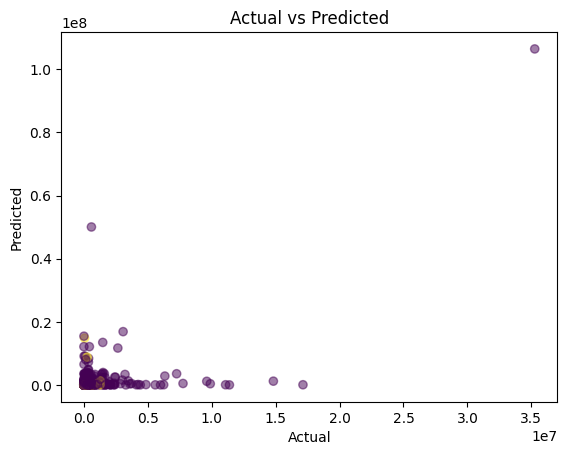

In [83]:
plt.scatter(y_test, y_pred, alpha=0.5, c=color_column_test, cmap='viridis')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# plt.xlim(0, max(max(y_test), max(y_pred)))
# plt.ylim(0, max(max(y_test), max(y_pred)))

# plt.xlim(0, 3*10**7)
# plt.ylim(0, 3*10**7)

# plt.xlim(0, 3*10**6)
# plt.ylim(0, 3*10**6)

# plt.xlim(0, 3*10**5)
# plt.ylim(0, 3*10**5)

plt.show()

In [84]:
correlation_matrix = df_data.corr()
print(correlation_matrix['Suma'].sort_values(ascending=False)[1:29])

Gmina_wiejska                                         0.135239
Wojewodztwo_Dolnoslaskie                              0.089233
Dochody_podatek_rolny                                 0.066759
Saldo_migracji_na_1000_ludnosci                       0.059790
Zmiana_liczby_ludnosci                                0.051100
Wojewodztwo_Warminsko_Mazurskie                       0.047088
Wojewodztwo_Pomorskie                                 0.043228
Wojewodztwo_Opolskie                                  0.019902
Odleglosc_Warszawa                                    0.018391
Saldo_migracji                                        0.010109
Wojewodztwo_Mazowieckie                               0.008000
Turysci_ogolem                                        0.007569
Turysci_zagraniczni                                   0.005412
Wojewodztwo_Podkarpackie                             -0.001333
Odleglosc_od_centrum_decyzyjnego                     -0.002845
Wplywy_z_oplaty_eksploatacyjnej                      -0

In [85]:
print(export_text(model, feature_names=feature_names))

|--- Wplywy_z_oplaty_eksploatacyjnej <= -7751.83
|   |--- value: [132625880.92]
|--- Wplywy_z_oplaty_eksploatacyjnej >  -7751.83
|   |--- Wplywy_z_oplaty_skarbowej <= 4494.45
|   |   |--- Wplywy_z_oplaty_skarbowej <= 4164.20
|   |   |   |--- Gestosc_zaludnienia <= 0.04
|   |   |   |   |--- Odleglosc_Warszawa <= 366.00
|   |   |   |   |   |--- Ludnosc_kobiety_w_wieku_przedprodukcyjnym <= 160.50
|   |   |   |   |   |   |--- value: [4988446.69]
|   |   |   |   |   |--- Ludnosc_kobiety_w_wieku_przedprodukcyjnym >  160.50
|   |   |   |   |   |   |--- Ludnosc_w_wieku_produkcyjnym <= 1453.50
|   |   |   |   |   |   |   |--- value: [8029322.26]
|   |   |   |   |   |   |--- Ludnosc_w_wieku_produkcyjnym >  1453.50
|   |   |   |   |   |   |   |--- value: [7792324.25]
|   |   |   |   |--- Odleglosc_Warszawa >  366.00
|   |   |   |   |   |--- Dochody_podatek_lesny <= 283601.20
|   |   |   |   |   |   |--- value: [223720.88]
|   |   |   |   |   |--- Dochody_podatek_lesny >  283601.20
|   |   |   |  

In [86]:
feature_importance = dict(zip(feature_names, model.feature_importances_))
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f'{importance:.4f} \u2014 {feature}')

0.3143 — Wplywy_z_oplaty_eksploatacyjnej
0.2451 — Wplywy_z_oplaty_skarbowej
0.0879 — Gestosc_zaludnienia
0.0826 — Dochody_podatek_lesny
0.0430 — Dochody_z_najmu_i_dzierzawy
0.0413 — Udzialy_w_podatkach_dochodowych_razem
0.0330 — Wojewodztwo_Dolnoslaskie
0.0209 — Ludnosc_na_1_km2
0.0137 — Saldo_migracji_na_1000_ludnosci
0.0126 — Bezrobotni_do_25_roku_zycia
0.0106 — Dochody_podatek_od_srodkow_transportowych
0.0085 — Bezrobotne_kobiety
0.0081 — Wymeldowania_na_wies_ogolem
0.0052 — Odleglosc_od_centrum_decyzyjnego
0.0046 — Dochody_podatek_od_spadkow
0.0044 — Wplywy_z_oplaty_targowej
0.0043 — Wojewodztwo_Opolskie
0.0042 — Ludnosc_kobiety_w_wieku_przedprodukcyjnym
0.0040 — Dochody_podatek_od_dzialalnosci_gospodarczej
0.0039 — Ludnosc_mezczyzni_w_wieku_produkcyjnym
0.0038 — Miejsca_noclegowe_caloroczne
0.0037 — Odleglosc_Warszawa
0.0035 — Dochody_razem
0.0030 — Zmiana_liczby_ludnosci
0.0028 — Wynagrodzenie_ogolem
0.0026 — Dochody_podatek_rolny
0.0025 — Turysci_zagraniczni
0.0022 — Zameldowani